 - Fundamental, S03 9장을 공부하다가 `cumsum()`이라는 메소드를 만났다.
 이 메소드는 `numpy`에 있는 메소드로서, 주어진 np.array에 대하여 cummulative sum을 출력하는 함수이다.
 - 이 메소드는 `np.random.randn` 함수와 같이 쓰였다.
 - 그러던 중, `matplotlib`으로 `plt.plot(np.random.randn(40).cumsum())`와 `plt.plot(np.random.randn(40))`의 그래프를 각각 그려봤는데, 그 형태가 너무나도 달랐다.
 - 그래서 이것과 관련하여 적기 시작했다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 모집단과 평균

어떤 확률변수 $X$가 집합 $A$ 안에서 어떤 확률분포를 이루고 있다고 하자.
이 확률변수 $X$의 평균을 $m$, 표준편차를 $\sigma$라고 하자.
\begin{align*}
\mathbb E(X)&=m\\
\sigma(X)&=\sigma
\end{align*}
이 확률분포에서 임의로 $n$개의 숫자를 추출하여 그 값을 $X_1$, $\cdots$, $X_n$이라고 하면, 각각의 $X_i$들은 그 자체로 확률변수가 된다.
그리고 이 확률변수들 각각은 평균이 $m$이고 표준편차가 $\sigma$가 될 것이다.
$$\begin{aligned}
\mathbb E(X_i)&=m\\
\sigma(X_i)&=\sigma
\end{aligned}\qquad(i=1,\cdots,n)\tag{0}$$
이때, 원래의 집합 $A$를 **모집단**이라고 하고, $n$개의 확률변수로 이루어진 집합 $\{X_1,\cdots,X_n\}$을 **표본**이라고 한다.

이 확률변수들의 평균인
$$\overline X = \frac{X_1+\cdots+X_n}n$$
을 **표본평균**이라고 부른다.
이 표본평균 또한 확률변수이므로, 평균과 표준편차를 계산할 수 있는데

$$\begin{aligned}
\mathbb E(\overline X)&=m\\
\sigma(\overline X)&=\frac\sigma{\sqrt n}
\end{aligned}\tag{1}$$
인 것이 알려져있다.

이것은 꽤 기초적인 사실이지만, 나는 학부 시절 확률과 통계를 열심히 공부하지 않았기 때문에 왜 이것이 성립하는지에 대해 증명을 해본 적이 없다.
그런데 아마도 $n=2$일 때에는 이중적분을 이용하면 문제가 풀릴 수 있을 것 같다.
해보진 않았지만, 열심히 계산하면 결과를 얻어낼 수 있을 것 같다.
일반적인 자연수 $n$일 때에는 다중적분, 즉 $n$번 적분하는 것을 가지고 풀 수 있을 것 같은데, 정확하게는 잘 모르겠다.

# 2. $\left\{X_1,\cdots,X_n\right\}$와 $\left\{X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+\cdots+X_n\right\}$의 그래프

In [2]:
import numpy as np

In [3]:
a = np.random.randn()
print(a)
b = np.random.randn(2)
print(b)

0.16014372516239025
[0.14559755 0.06840027]


`np.random.randn()`는 표준정규분포(standard normal distribution, $N(0,1)$)에서 하나의 숫자를 임의로 추출한다.
즉, 모집단은 $A=(-\infty,\infty)=\mathbb R$이고 이 모집단은 확률밀도함수
$$f(x)=\frac1{\sqrt{2\pi}}e^{-\frac{x^2}2}\quad(x\in\mathbb R)$$
를 가지는 확률분포를 따르고 있다.
이 확률분포에서 추출한 하나의 숫자를 $X$라고 하면 $X$의 평균은
$$\mathbb E(X)=0$$
이고, 표준편차는
$$\sigma(X)=1$$
이다.

`np.random.rand(n)`은 모집단에서 $n$개의 숫자를 임의추출한다.
각각의 숫자들을 $X_1$, $\cdots$, $X_n$이라고 하면
$$[X_1,\cdots,X_n]\tag{2}$$
형태의 리스트를 출력하는 셈이다.

In [4]:
L = np.array([1,2,3])
L.cumsum()

array([1, 3, 6])

이 함수는 `np.array` 형태의 `[1, 2, 3]`을 `[1, 1 + 2, 1 + 2 + 3]`로 출력한다.
그러니까, `np.random.randn(n).cumsum()`은
$$[X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+\cdots+X_n]\tag{3}$$
형태의 리스트를 출력한다.

<function matplotlib.pyplot.show(close=None, block=None)>

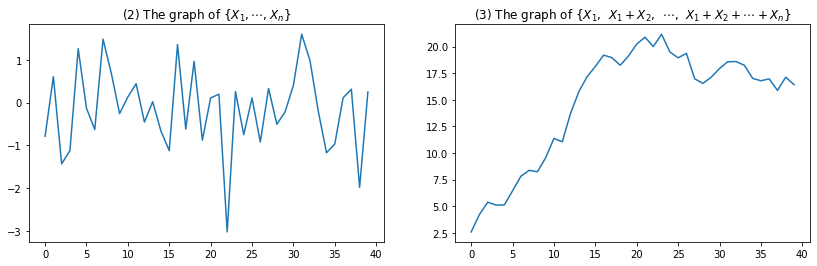

In [5]:
plt.rcParams["figure.figsize"] = (14,4)

plt.subplot(1,2,1)
plt.plot(np.random.randn(40))
plt.title(r'(2) The graph of $\{X_1,\cdots,X_n\}$')

plt.subplot(1,2,2)
plt.plot(np.random.randn(40).cumsum())
plt.title(r'(3) The graph of $\{X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+X_2+\cdots+X_n\}$')

plt.show

왼쪽 그래프, 즉, (2) 수열 $\left\{X_1,\cdots,X_n\right\}$에 대한 그래프와
오른쪽 그래프, 즉, (3) 수열 $\left\{X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+\cdots+X_n\right\}$에 대한 그래프가 굉장히 다르게 생겼다.
왜 이렇게 다를까? 어떻게 다를까? 하는 질문떄문에 이 글을 쓰기 시작했다.

내가 생각한 둘 사이의 차이점은 다음과 같다.
1. 왼쪽 그래프는 상당히 변동성이 커보인다.
반면에 오른쪽 그래프는 상당히 '연속함수'의 그래프인 것처럼 보인다.
그렇다고 왼쪽 그래프가 불연속 함수의 그래프인 것은 아니지만, 여하튼 오른쪽 그래프가 덜 움직이고, 안정적이다.
왼쪽 그래프는 굉장히 불안정한 모양이다.
2. 왼쪽 그래프의 값들은 -2와 2 사이에 많이 몰려있다.
하지만 오른쪽 그래프는 아래쪽에 많이 몰려있고, 더이상 올라오지 않는다.
그리고 그 절댓값이 굉장히 크다(지금 보이는 바로는 8 정도)

첫번째 차이점에 대해 분석하려면 (2)와 (3)의 산포도를 계산해보면 된다.
(2)의 산포도, 예를 들어 분산을 계산하면 다음과 같다.
\begin{align*}
\frac{(X_1-\overline X)^2+\cdots+(X_n-\overline X)^2}n
&=\frac1n\left(\sum_{i=1}^n{X_i}^2-2\overline X\sum_{i=1}^nX_i+n{\overline X}^2\right)\\
&=\frac1n\sum_{i=1}^n{X_i}^2-2\overline X^2+{\overline X}^2\\
&=\mathbb E\left({X_i}^2\right)-\left(\mathbb E(X_i)\right)^2\\
&=V(X_i)
\end{align*}
하지만 (3)은 굉장히 어렵다.
(3)의 분산을 구하기 위해서는 먼저 평균을 계산해야 하는데 평균 자체도 이해하기 어렵다.
(3)의 평균은
\begin{align*}
\frac{X_1+(X_1+X_2)+(X_1+X_2+x_3)+\cdots+(X_1+X_2+\cdots+X_n)}n
&=\frac{nX_1+(n-1)X_2+(n-2)X_3+\cdots+X_n}n\\
&=\frac1n\sum_{i=1}^n(n+1-i)X_i
\end{align*}
인 것이다.
그러니 이것을 가지고 분산을 구하는 건 더 어려운 일이 될 것이다.
물론, 결국 구하는 방법이야 있을 것이지만, 당장 눈에 들어오지 않는다.

# 3. $X_n$과 $S_n$의 분포

하지만 두번째 차이점에 대해서는 조금 언급할 수 있겠다.
(2)의 마지막 확률변수 $X_n$과 (3)의 마지막 확률변수 $X_1+X_2+\cdots+X_n$ 만을 비교해보자.
먼저 (2)에서 $X_n$의 평균과 표준편차는 너무나도 명백하다.
식 (0)에 의해
$$\begin{aligned}
\mathbb E(X_n)&=m\\
\mathbb V(X_n)&=\sigma
\end{aligned}$$
인 것이다.

그리고 (3)에서 $X_1+X_2+\cdots+X_n$의 평균과 표준편차 또한 구할 수 있다.
먼저 이 값을 $S_n$이라고 하자.
즉
$$S_n=X_1+X_2+\cdots+X_n$$
이라고 하자.
그러면
$$S_n=n\times\frac{X_1+X_2+\cdots+X_n}n=n\overline X$$
이다.
따라서
$$\begin{aligned}
\mathbb E(S_n)=n\mathbb E\left(\overline X\right)=n\mathbb E(X)
\end{aligned}$$
이다.
또한
$$\begin{aligned}
\mathbb \sigma(S_n)=n\mathbb \sigma\left(\overline X\right)=n\times\frac{\mathbb \sigma(X)}{\sqrt n}=\sqrt n\mathbb \sigma(X)
\end{aligned}$$
이 된다.

이것을 아래 코드를 통해 구현해보았다.
$n=25$인 경우에 대하여, $\sigma(S_n)$이 정말 $\sigma(X)$의 5배가 되는지 시각적으로 확인해봤다.

<function matplotlib.pyplot.show(close=None, block=None)>

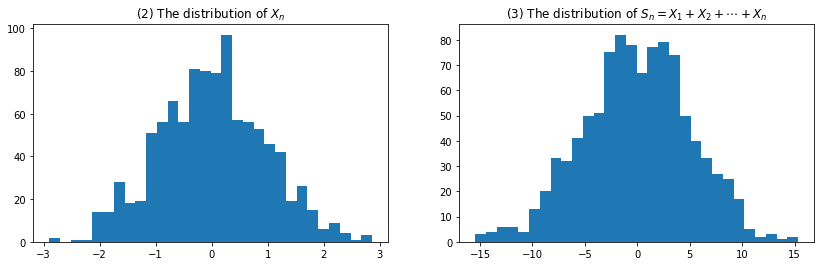

In [6]:
n = 25
k = 1000
distributionXn=[]
distributionSn=[]
for i in range(k):
    Sn = np.random.randn(n).cumsum()[-1]
    distributionSn.append(Sn)
    Xn = np.random.randn(n)[-1]
    distributionXn.append(Xn)

plt.rcParams["figure.figsize"] = (14,4)

plt.subplot(1,2,1)
plt.hist(distributionXn, bins=30)
plt.title(r'(2) The distribution of $X_n$')

plt.subplot(1,2,2)
plt.hist(distributionSn, bins=30)
plt.title(r'(3) The distribution of $S_n=X_1+X_2+\cdots+X_n$')

plt.show

코드에서 `n`은 25로 설정되어 있다.
$X_i$들 각각은 분포 $N(0,1)$을 따르고 $S_n = X_1+X_2+\cdots+X_n$이다.
왼쪽 그래프는 $X_n$을 1000번 계산하여, 그 1000개의 분포를 나타낸 것이다.
마찬가지로, 오른쪽 그래프는 똑같은 1000개의 사례에 대하여 $S_n$을 계산하고 그 분포를 나타낸 것이다.

그림을 확인해보니, (2)일 때에 비해 (3)일 때의 표준편차가 다섯 배 정도 증가한 것이 보인다.
아까 계산했던 그대로의 결과가 나왔다.